In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [37]:
restaurant_filepath ='/content/Restaurant_and_Market_Health_Violations.csv'
restaurant_data = pd.read_csv(restaurant_filepath)
df = restaurant_data

In [38]:
csv_url = "https://raw.githubusercontent.com/Saad7n/NYC-Restaurant-Inspections/refs/heads/main/Restaurant_and_Market_Health_Violations.csv"

df = pd.read_csv(csv_url)

#I also wanted to add a github to make sure it works, because

In [39]:
df.head(10)

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,facility_id,facility_state,facility_zip,employee_id,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030
1,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027
2,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035
3,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033
4,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029
5,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF044
6,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F006,# 06. Adequate handwashing facilities supplied...,OUT OF COMPLIANCE,2,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF006
7,DA0GBKW3F,03/30/2018 12:00:00 AM,SPROUTS FARMERS MARKET#403,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,2245 YOSEMITE DR,LOS ANGELES,FA0224114,CA,90041-2618,EE0000162,OW0033830,"SPROUTS, INC.","FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,MEAT MARKET,ACTIVE,PR0179289,97,1,ROUTINE INSPECTION,DA0GBKW3FF044
8,DA0GBKW3F,03/30/2018 12:00:00 AM,SPROUTS FARMERS MARKET#403,F039,# 39. Wiping cloths: properly used and stored,OUT OF COMPLIANCE,1,A,2245 YOSEMITE DR,LOS ANGELES,FA0224114,CA,90041-2618,EE0000162,OW0033830,"SPROUTS, INC.","FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,MEAT MARKET,ACTIVE,PR0179289,97,1,ROUTINE INSPECTION,DA0GBKW3FF039
9,DA0GBKW3F,03/30/2018 12:00:00 AM,SPROUTS FARMERS MARKET#403,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,A,2245 YOSEMITE DR,LOS ANGELES,FA0224114,CA,90041-2618,EE0000162,OW0033830,"SPROUTS, INC.","FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,MEAT MARKET,ACTIVE,PR0179289,97,1,ROUTINE INSPECTION,DA0GBKW3FF037


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11969 entries, 0 to 11968
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   serial_number          11969 non-null  object
 1   activity_date          11969 non-null  object
 2   facility_name          11969 non-null  object
 3   violation_code         11969 non-null  object
 4   violation_description  11969 non-null  object
 5   violation_status       11969 non-null  object
 6   points                 11969 non-null  int64 
 7   grade                  11969 non-null  object
 8   facility_address       11969 non-null  object
 9   facility_city          11969 non-null  object
 10  facility_id            11969 non-null  object
 11  facility_state         11969 non-null  object
 12  facility_zip           11969 non-null  object
 13  employee_id            11969 non-null  object
 14  owner_id               11969 non-null  object
 15  owner_name         

In [41]:
print(restaurant_data['service_code'].unique())

print(restaurant_data['service_description'].unique())

pd.crosstab(index=restaurant_data['service_description'], columns='count')

[  1 401]
['ROUTINE INSPECTION' 'OWNER INITIATED ROUTINE INSPECT.']


col_0,count
service_description,
OWNER INITIATED ROUTINE INSPECT.,171
ROUTINE INSPECTION,11798


array([[<Axes: title={'center': 'points'}>,
        <Axes: title={'center': 'program_element_pe'}>],
       [<Axes: title={'center': 'score'}>,
        <Axes: title={'center': 'service_code'}>]], dtype=object)

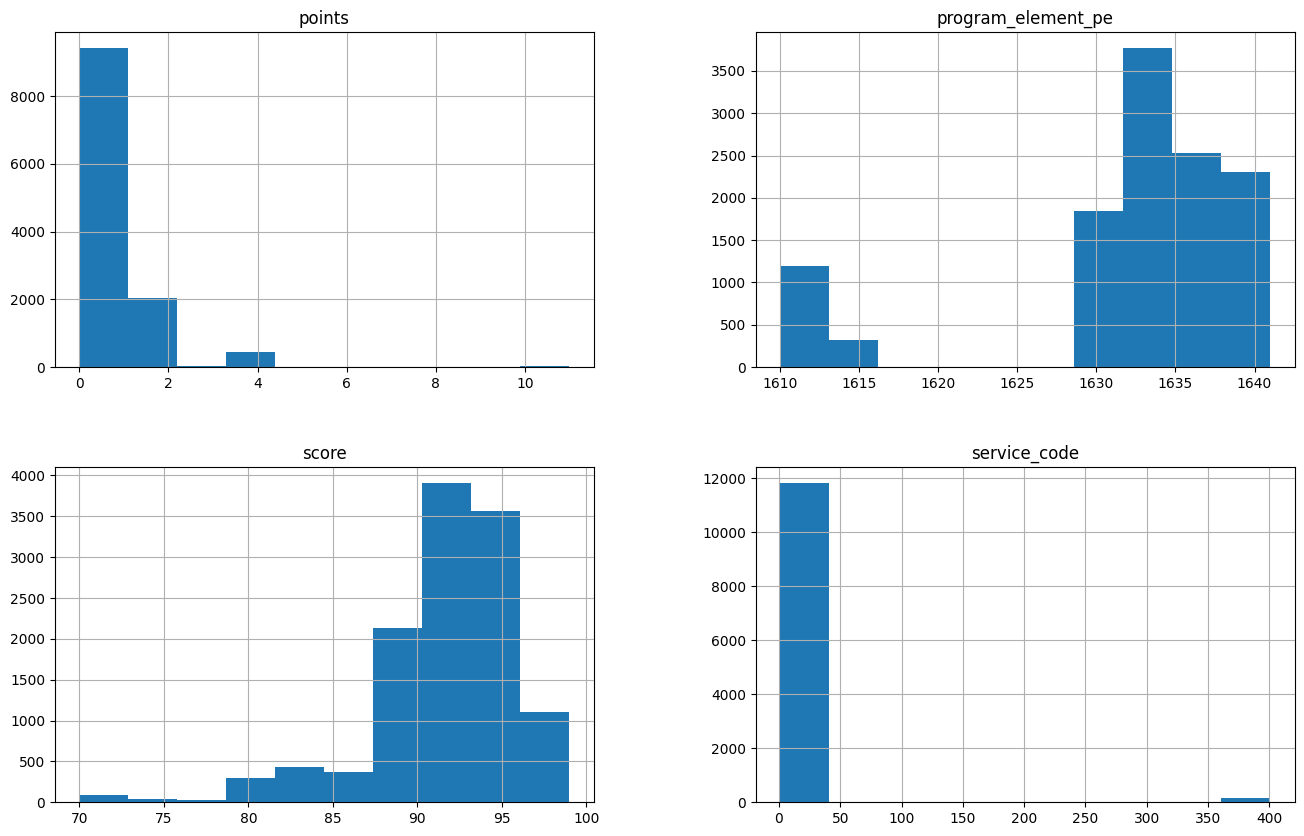

In [42]:
df.hist()